# Image Captioning

Yue Wang (yw6277)

## Background

**1. Introduction**

Image captioning is a technique used to generate logic sentences based on 
certain images. Usually, there would be more than one objects in a picture. It is esay for human to discribe it by capturing and expressing the relationship between the objectives. However, this is a challenge for computers. Given this, a new technique focusing on the attention came up with the finding that human visualization is the presence of attention[1]. To be specific, image captioning with attention mimics human visualization attending to the salient part of the image.

**2. Previous work and "new" contribution**

Many methods have been proposed to solve the image captioning problem, and most of them are based on Recurrent Neural Network (RNN). For example, Mao et al.[2] uses a model consisting of two sub-networks: a deep recurrent neural network for sentences and a deep convolutional network for images. Vinyals et al.[3] uses LSTM RNNs for their model and show the picture to the RNN at the beginning. Besides the image, recurrent convolutional models developed by Donahue et al.[4] which are "doubly deep" in that they can be compositional in spatial and temporal "layers" can do the video recognition tasks as well. In Karpathy&Li's[5] work, they proposed to align two models which are CNN over image region and bidirectional RNN over sentences through a multimodal embedding. Even though their work can visualize the attention component in the picture, they use object detection system which cannot attend "non-object" region.

In this work, it has four main contribution:

(1) Propose two image caption generators and each with different attention mechanism. One is soft attention mechanism, the other is hard attention mechanism.

(2) It shows the process of generating the caption which means "where" and "what" the generator focused on.

(3) Validate the usefulness of the generator on three datasets: Flickr8k, Flickr30k and the MS COCO dataset.

(4) In training the soft attention version meodel, it introduces a form of doubly stochastic regularization. And this penalty improves both the overall BLEU score and METEOR score and leads to more vivid caption by a single model without ensembling.

**3. Model and two attention mechanisms**

(1) Encoder-decoder framework

In this work, the model(as Fig.1) proposed belongs to the encoder-decoder family, with a convolutional neural network(CNN) as encoder for image and long short-term memory(LSTM) network as decoder for sentence.

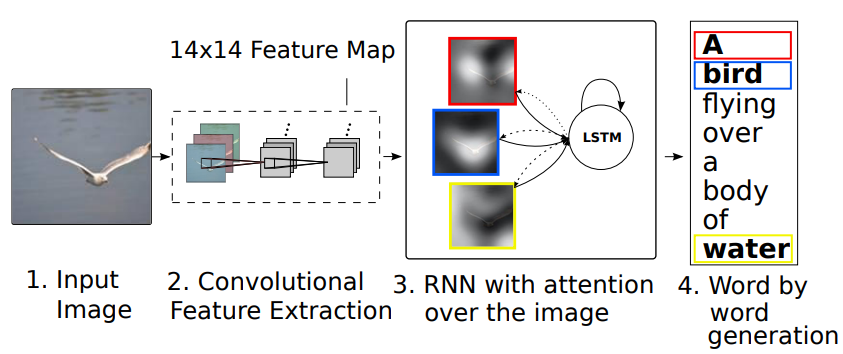

Fig.1(Image from[6])



*   Encoder: Convolutional Features

The aim of using CNN is to extract feature vectors, each of which corresponds to a part of the image. What is worth mentioned is that, unlike some other work which extracts features from fully connected layer, they extract features from a lower convolutional layer. This makes the decoder selectively focus on certain parts of the image and use subset of the features instead of all of them.

*   Decoder: Long Short-Term Memory Network

Actually, LSTM network can be interpreted as RNN with more complicated neurons. RNN may easily cause gradient vanishing and gradient exploding due to the recurrent structure and backpropogation algorithm. Also, RNN treats the data in a time scale, so the information of the hidden unit at some time point is composed of the smaple input at this time and the output from its own at privious time. Given this, we know that RNN doesn't have the memory function. For LSTM network, a LSTM cell always have an input gate, a forget gate and an output gate. And gates can control the "going or not going" of the information which are multiplication of a sigmoid function and input of the sigmoid layer. When the result is zero, it means "let nothing through", while the value of one means"let it through". Besides these, another key of LSTM is the cell state which is not contained in RNN as well. Through these gates, cell state is protected and controled. And the final output will be based on a filtered cell state which only contains the part we decide to output.

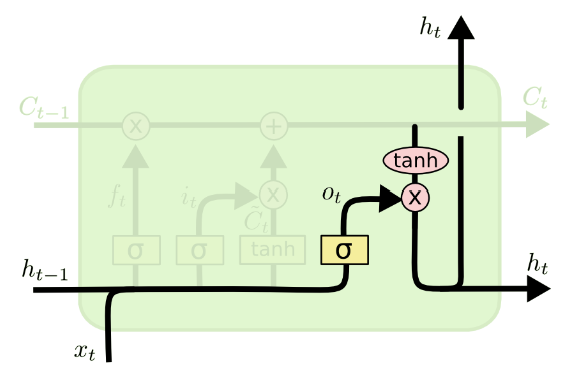

Fig.2(From article [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/))

(2) Attention mechanisms

At present, we use soft attention mostly. Although hard attention can sometimes get better training effect, the training difficulty is also much higher. The main difference between these two attention calculation methods is that they calculate the context vector Z differently.

*   Hard attention

When the encoder uses hard attention, we sample to get Z. The weights follow Bernoulli distribution, which is 0 or 1. Given this, for certain time point and region, we only have two choices- focus on it or not focus on it. For example, X1-Xn individually represent a small part of an image and we assign a weight α to each Xi, which refers to the probiliy of how much we should pay attention to the region. And the sum of all α should be one. Thus, instead of a weighted average, hard attention uses α as the sampling rate to select a xi as the input to the LSTM. Also, it's a stochastic learnig process. We can tell how the hard attention model works from Fig.3.

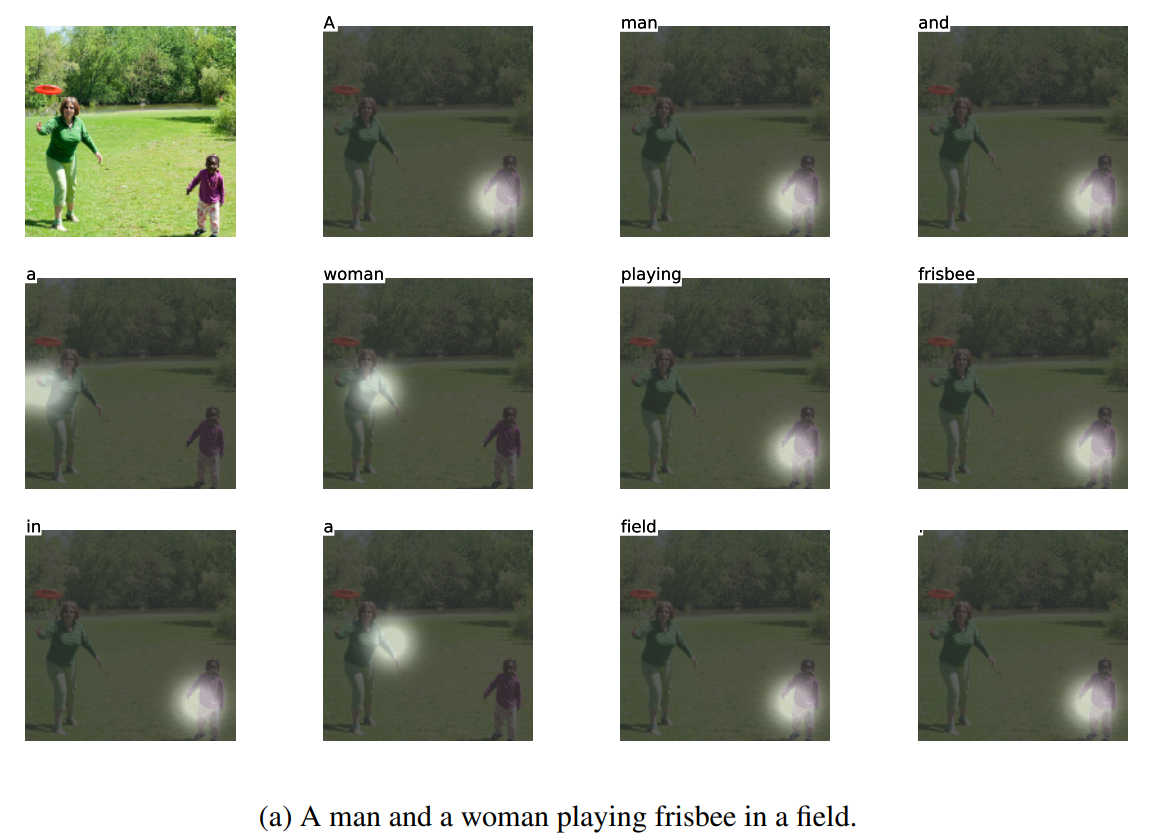

Fig.3(Image from[6])

*   Soft attention

For soft attention, we get Z by average. To be specific, we pay attention to every part of the image but with different degree of importance. For example, X1-Xn individually represent a small part of an image, and α is the weight assgined to X. The sum of all α is 1 as they are the output of a softmax function. Finally, we use it to calculate the weighted average of X1-Xn. Then we can get formula Z= ∑αi*Xi, which is the input of LSTM. We can tell how the soft attention model works from Fig.4.

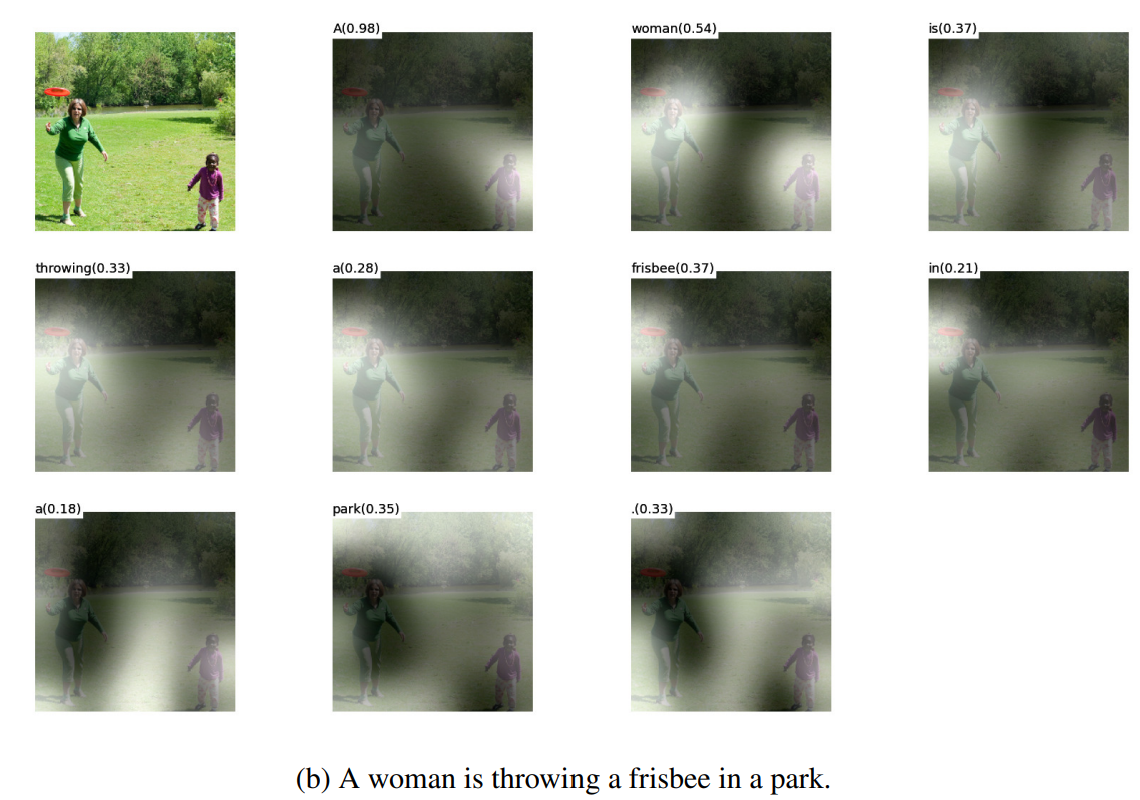

Fig.4(Image from[6])

**4.Existing challengs for comparing BLEU metric and METEOR metric**

When evaluating a machine translation system, the quality of the translation cannot be directly reflected by the output in the form of text, so we need to use some appropriate quantitative criteria to evaluate the translation results of machine translation. For, image captioning, we can interpret the caption generator as translating a picture in to a sentence. And there are two common evaluation method: BLEU metric and METEOR metic. People may want to campare these two method to find which one has better performance, but there are following three challenges existed.



*   Different choices of convolutional feature extractor, which is the decoder model. More advanced and recent decoder model may lead to better performance.
*   A single model versus ensemble. Some other article reported better performance by using ensembling.
*   Differences between dataset splits. Find difference between using the predefined splits of Flickr8k and other two datasets:Flickr30k, MS COCO which are lack of standardized splits.

**5.Dataset**

I will introduce three datasets here: Flickr8k, Flickr30k and MS COCO.The development of Microsoft COCO Caption dataset is based on the work of Microsoft Common Objects in COntext (COCO) dataset. And it contain almost 330,000 images, each of the image has more than 5 captions. For Flickr8k and Flickr30k, we can tell from their name, these two dataset seperately have 8k and 30k images and every picture has corresponding 5 captions as well. So, it is obvious that the disadvantage of Flickr8k and Flickr30k is the small amount of the data which may cause overfitting. Because this project is based on article published in 2014 when Flickr8k and Flickr30k were used widely. While, in recent research, we seldom use them, instead, we use MS COCO much more often.

## Replicating the existing work


*   The source of the code is from [here](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb#scrollTo=QASbY_HGo4Lq).

* The code below almost realizes the process of image captioning decribing in the article: [Show, Attend and Tell: Neural Image Caption Generation with Visual Attention](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1502.03044.pdf). First, it downloads data from dataset MS COCO and extract a subset of the data which will be used next. It chooses the first 6,000 shuffled images for using. Then, it preprocesses the chosen image data by using InceptionV3. In this notebook, InceptionV3 is used to do the image classification and then transfer the image name in to feature vectors. Next, it tansforms the captions into integer sequences using the TextVectorization layer, which means it lables each word an index and finally get word-index mapping. After all of the preperation, finally, it splits the data into test and training data and builds the model and starts to train. The model is composed of a CNN encoder with sotf-attention and a LSTM/RNN decoder. In the end, it generates captions on new images using the trained model.


*   This code can run without any changes.

##### Copyright 2018 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image captioning with visual attention

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/text/image_captioning">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/text/image_captioning.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [36]:
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# your model focuses on during captioning
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

## Download and prepare the MS-COCO dataset

In [3]:
# Download caption annotation files
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                           cache_subdir=os.path.abspath('.'),
                                           origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                           extract=True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

13510582272/13510573713 [==============================] - 414s 0us/step


## Optional: limit the size of the training set 
To speed up training for this tutorial, you'll use a subset of 30,000 captions and their corresponding images to train your model. Choosing to use more data would result in improved captioning quality.

In [4]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [5]:
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

In [80]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths[:6000]
print(len(train_image_paths))

6000


In [81]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

<start> a man carrying a skating board along the ocean <end>


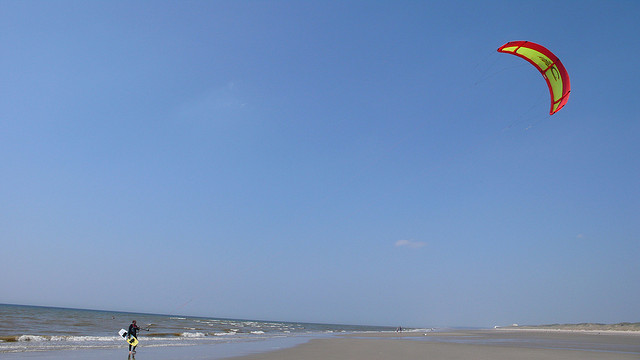

In [82]:
print(train_captions[0])
Image.open(img_name_vector[0])

## Preprocess the images using InceptionV3

In [83]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

## Initialize InceptionV3 and load the pretrained Imagenet weights


In [84]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

## Caching the features extracted from InceptionV3


In [85]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in image_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

## Preprocess and tokenize the captions

In [86]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

# We will override the default standardization of TextVectorization to preserve
# "<>" characters, so we preserve the tokens for the <start> and <end>.
def standardize(inputs):
  inputs = tf.strings.lower(inputs)
  return tf.strings.regex_replace(inputs,
                                  r"!\"#$%&\(\)\*\+.,-/:;=?@\[\\\]^_`{|}~", "")

# Max word count for a caption.
max_length = 50
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    output_sequence_length=max_length)
# Learn the vocabulary from the caption data.
tokenizer.adapt(caption_dataset)

In [87]:
# Create the tokenized vectors
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

In [88]:
# Create mappings for words to indices and indices to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

## Split the data into training and testing

In [89]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [90]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(24006, 24006, 6004, 6004)

## Create a tf.data dataset for training


Your images and captions are ready! Next, let's create a `tf.data` dataset to use for training your model.

In [91]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [92]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [93]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

## Model


In [94]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [95]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [96]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [97]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

In [98]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Checkpoint

In [99]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [100]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

## Training



In [101]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [102]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [103]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 8 Batch 0 Loss 2.1668
Epoch 8 Batch 100 Loss 1.0568
Epoch 8 Batch 200 Loss 1.0241
Epoch 8 Batch 300 Loss 0.8734
Epoch 8 Loss 1.026962
Time taken for 1 epoch 166.05 sec

Epoch 9 Batch 0 Loss 0.7987
Epoch 9 Batch 100 Loss 0.7242
Epoch 9 Batch 200 Loss 0.8474
Epoch 9 Batch 300 Loss 0.7242
Epoch 9 Loss 0.793016
Time taken for 1 epoch 63.65 sec

Epoch 10 Batch 0 Loss 0.7797
Epoch 10 Batch 100 Loss 0.7238
Epoch 10 Batch 200 Loss 0.7316
Epoch 10 Batch 300 Loss 0.7140
Epoch 10 Loss 0.701933
Time taken for 1 epoch 63.20 sec

Epoch 11 Batch 0 Loss 0.6195
Epoch 11 Batch 100 Loss 0.6032
Epoch 11 Batch 200 Loss 0.6704
Epoch 11 Batch 300 Loss 0.5628
Epoch 11 Loss 0.641001
Time taken for 1 epoch 63.51 sec

Epoch 12 Batch 0 Loss 0.5872
Epoch 12 Batch 100 Loss 0.6686
Epoch 12 Batch 200 Loss 0.6314
Epoch 12 Batch 300 Loss 0.5556
Epoch 12 Loss 0.590692
Time taken for 1 epoch 63.35 sec

Epoch 13 Batch 0 Loss 0.5459
Epoch 13 Batch 100 Loss 0.5234
Epoch 13 Batch 200 Loss 0.5395
Epoch 13 Batch 300 Loss

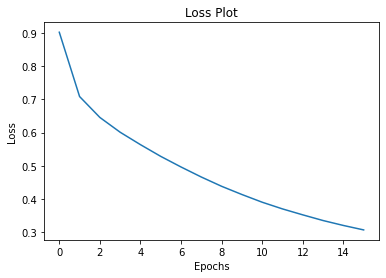

In [73]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Caption!

In [104]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('<start>')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [105]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(int(np.ceil(len_result/2)), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> several skiers prepare to go down snowy slopes. <end>
Prediction Caption: a boy [UNK] dressed in a tree. <end>


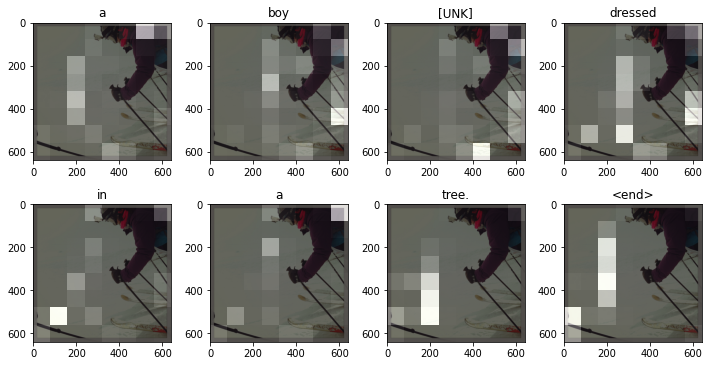

In [106]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

## Building on the existing work

## Try it on my own images
In this section, I tried my own picture found on the internet to exam the quality of the model. And the result turned out a little problme, some sentences are not logical. Remember we just have 6,000 images and almost 30,000 captions correspondingly in our dataset. And this may lead to some wierd captioning. 

And the code in this section is adpted from the reference notebook of this project.


Prediction Caption: a [UNK] toy bench next to a water <end>


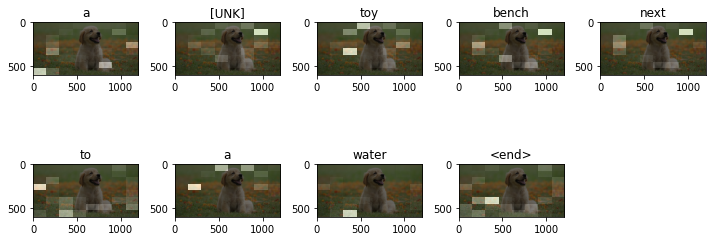

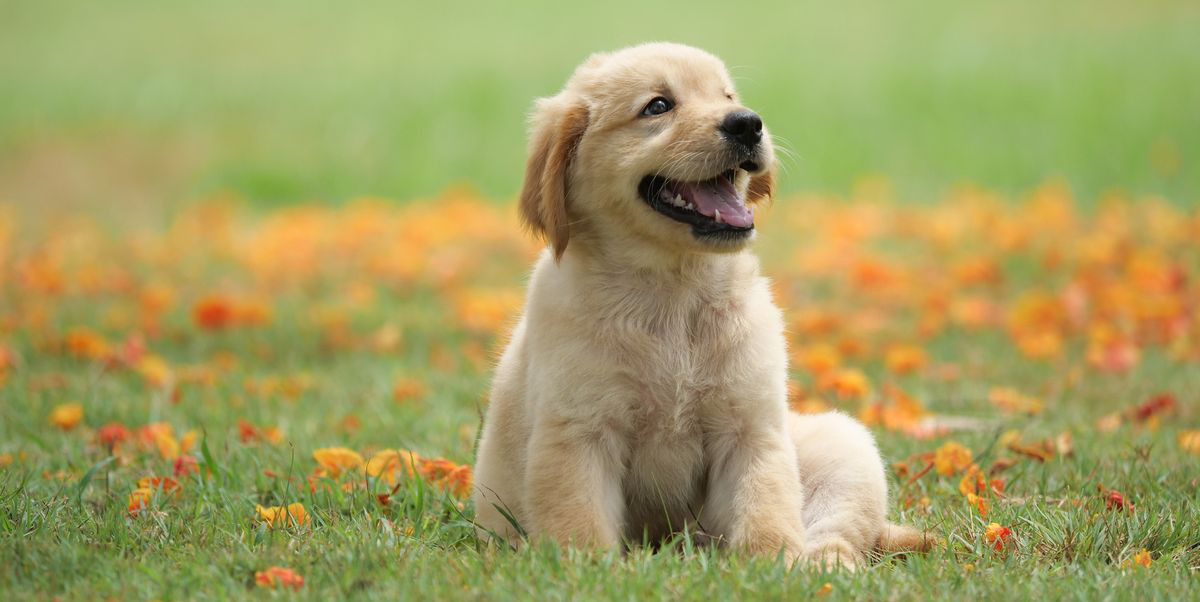

In [107]:
image_url = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1.00xw:0.669xh;0,0.190xh&resize=1200:*'
#image_url = 'https://cdn.mos.cms.futurecdn.net/v44n2mBJgaRoCkkFGjDtRP.jpeg'
#image_url = 'https://media.wired.com/photos/610d7ec8798f0e2c853b6fd6/3:2/w_1280%2Cc_limit/Gear-Running-App-545114700.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension, origin=image_url)

result, attention_plot = evaluate(image_path)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)

So I'm going to load more data to see the difference.

The following code is the almost the same as the orignal one, instead the number of data.

In [78]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths[:10000]
print(len(train_image_paths))

10000


Prediction Caption: a large white cat sitting inside a sports car. <end>


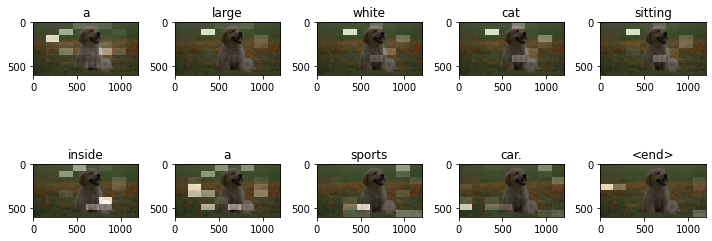

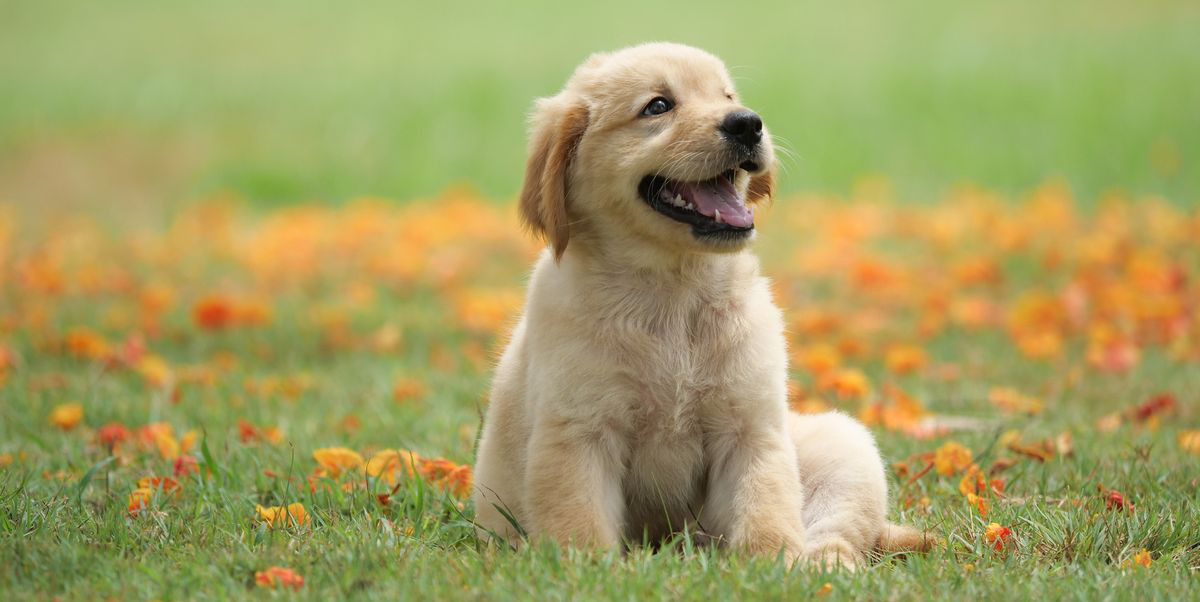

In [ ]:
image_url = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1.00xw:0.669xh;0,0.190xh&resize=1200:*'
#image_url = 'https://cdn.mos.cms.futurecdn.net/v44n2mBJgaRoCkkFGjDtRP.jpeg'
#image_url = 'https://media.wired.com/photos/610d7ec8798f0e2c853b6fd6/3:2/w_1280%2Cc_limit/Gear-Running-App-545114700.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension, origin=image_url)

result, attention_plot = evaluate(image_path)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)

The result seems not to be improved much, but it has some improvement. The other difference is that the degress of complication of the sentence seems to be higher. I guess that a small amount data increased won't be able to make huge changes. Run the model in the whole MS COCO dataset will make the result much more accurate.

## References

[1] Rensink, Ronald A. The dynamic representation of scenes. Visual
cognition, 7(1-3):17–42, 2000.

[2] Mao, Junhua, Xu, Wei, Yang, Yi, Wang, Jiang, and Yuille, Alan.
Deep captioning with multimodal recurrent neural networks
(m-rnn). arXiv:1412.6632, December 2014.

[3] Vinyals, Oriol, Toshev, Alexander, Bengio, Samy, and Erhan,
Dumitru. Show and tell: A neural image caption generator.
arXiv:1411.4555, November 2014.

[4] Donahue, Jeff, Hendrikcs, Lisa Anne, Guadarrama, Segio, Rohrbach, Marcus, Venugopalan, Subhashini, Saenko,
Kate, and Darrell, Trevor. Long-term recurrent convolutional networks for visual recognition and description.
arXiv:1411.4389v2, November 2014.

[5] Karpathy, Andrej and Li, Fei-Fei. Deep visual-semantic alignments for generating image descriptions. arXiv:1412.2306,
December 2014.

[6] Kelvin Xu, Jimmy Lei Ba, Ryan Kiros, Kyunghyun Cho, Aaron Courville, Ruslan Salakhutdinov, Richard S. Zemel, and Yoshua Bengio. 2015. Show, attend and tell: neural image caption generation with visual attention. In Proceedings of the 32nd International Conference on International Conference on Machine Learning - Volume 37 (ICML'15). JMLR.org, 2048–2057.